In [1]:
# Import necessary packages
import matplotlib.pyplot as plt
import timeit

from keras.datasets import mnist
from keras.models import Model
import keras.layers as kl
from keras import backend
from keras.utils import to_categorical


Using TensorFlow backend.


In [2]:
# load (downloaded if needed) the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

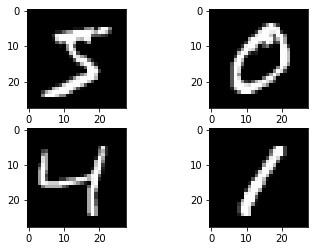

In [3]:
# plot 4 images as gray scale
for i in range(4):
    subplot = 221 + i
    plt.subplot(subplot)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

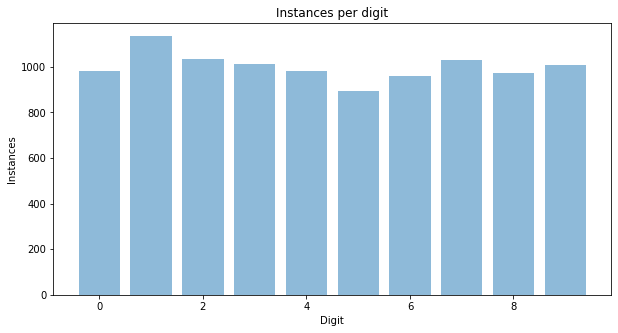

In [4]:
plt.figure(figsize=(10,5))
plt.bar(Counter(y_test).keys(), Counter(y_test).values(), align='center', alpha=0.5)
plt.ylabel('Instances')
plt.xlabel('Digit')
plt.title('Instances per digit')
plt.show()

In [5]:
x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
def get_model(learning_rate = 0.1, nb_classes = 10, input_shape = (28, 28, 1)):
    backend.clear_session()
    
    input_layer = kl.Input(input_shape)

    conv_1 = kl.Conv2D(45, (5,5))(input_layer)
    max_layer_1 = kl.MaxPooling2D(2)(conv_1)
    
    conv_2 = kl.Conv2D(30, (3,3))(max_layer_1)
    max_layer_2 = kl.MaxPooling2D(2)(conv_2)
    
    conv_3 = kl.Conv2D(15, (2,2))(max_layer_2)
    max_layer_3 = kl.MaxPooling2D(2)(conv_3)
    
    flatten_outputs = kl.Flatten(name="flatten_outputs")(max_layer_3)
    
    dense_1 = kl.Dense(64)(flatten_outputs)
    
    dense_2 = kl.Dense(32)(dense_1)

    dense_3 = kl.Dense(nb_classes, activation='softmax', name="output")(dense_2)

    model = Model(inputs=input_layer, outputs=dense_3)

    model.compile(loss='categorical_crossentropy', optimizer='adam',
        metrics=['accuracy'])

    return model

In [14]:
model = get_model()

In [15]:
epochs = 20
bs = 200

start = timeit.default_timer()

hist = model.fit(x_train, y_train,
                 epochs = epochs,
                 batch_size = bs,
                 validation_split=0.5,
                 verbose=1)

stop = timeit.default_timer()

print('Time: ', stop - start)  

Train on 30000 samples, validate on 30000 samples
Epoch 1/20
30000/30000 [==============================] - 30s 1ms/step - loss: 0.5803 - accuracy: 0.8219 - val_loss: 0.2082 - val_accuracy: 0.9352
Epoch 2/20
30000/30000 [==============================] - 27s 895us/step - loss: 0.1601 - accuracy: 0.9510 - val_loss: 0.1341 - val_accuracy: 0.9595
Epoch 3/20
30000/30000 [==============================] - 25s 842us/step - loss: 0.1127 - accuracy: 0.9658 - val_loss: 0.1110 - val_accuracy: 0.9670
Epoch 4/20
30000/30000 [==============================] - 27s 914us/step - loss: 0.0882 - accuracy: 0.9729 - val_loss: 0.1178 - val_accuracy: 0.9645
Epoch 5/20
30000/30000 [==============================] - 28s 929us/step - loss: 0.0766 - accuracy: 0.9762 - val_loss: 0.0890 - val_accuracy: 0.9727
Epoch 6/20
30000/30000 [==============================] - 27s 902us/step - loss: 0.0639 - accuracy: 0.9801 - val_loss: 0.0851 - val_accuracy: 0.9736
Epoch 7/20
30000/30000 [==============================] - 

In [16]:
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)

In [17]:
print("Loss = %.2f, Accuracy = %.2f" %(scores[0], scores[1]))

Loss = 0.06, Accuracy = 0.98
